### Regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. 

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated. 

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.

The goal of this question in the assignment is to create a model that predicts the value of a target variable by learning the relationship between independent and its corresponding dependent variable using linear regression, ridge regression and gradient descent.  


## Gradient descent algorithm 
\begin{equation}
\theta^{+} = \theta^{-} + \frac{\alpha}{m} (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2
\end{equation}

where
\begin{equation}
h(x_i) = \theta^T \bar{x}
\end{equation}

In [ ]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

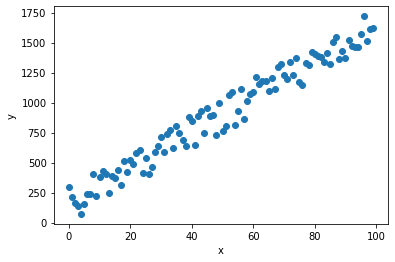

In [ ]:
# Do not change the code in this cell
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    # Start code here
    num_samples = len(op)
    cost_sum = 0
    for x, y in zip(ip, op):
        y_hat = params[0] + params[1] * x
        cost_sum += (y - y_hat)**2

    cost = cost_sum / num_samples / 2
    # End code here
    return cost


### Batch gradient descent
Algorithm can be given as follows:

```for j in 0 -> max_iteration: 
    for i in 0 -> m: 
        theta += (alpha / m) * (y[i] - h(x[i])) * x_bar
```

In [ ]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # Start code here
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(op)
    cost = np.zeros(max_iter)
    params_store = np.zeros((2, max_iter))
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost[iteration] = compute_cost(ip, op, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        gradient_0 = 0
        gradient_1 = 0
        # Apply batch gradient descent
        for x,y in zip(ip, op):
            y_hat = params[0] + params[1] * x
            gradient_0 += (y_hat - y) / num_samples
            gradient_1 += (y_hat - y) * x / num_samples

        params[0] = params[0] - alpha * gradient_0 / 2
        params[1] = params[1] - alpha * gradient_1 / 2    
        iteration += 1
    # End code here
    
    return params, cost, params_store

In [ ]:
# Do not change the code in this cell
# Training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 6489631.308726865
--------------------------
iteration: 1
cost: 2573072.722469314
--------------------------
iteration: 2
cost: 1022531.5926454207
--------------------------
iteration: 3
cost: 408681.7394687416
--------------------------
iteration: 4
cost: 165662.01078916172
--------------------------
iteration: 5
cost: 69451.57214570054
--------------------------
iteration: 6
cost: 31361.998680216675
--------------------------
iteration: 7
cost: 16282.10654792017
--------------------------
iteration: 8
cost: 10311.601173093502
--------------------------
iteration: 9
cost: 7947.444260400383
--------------------------
iteration: 10
cost: 7011.01791686927
--------------------------
iteration: 11
cost: 6639.8211623206535
--------------------------
iteration: 12
cost: 6492.395339292414
--------------------------
iteration: 13
cost: 6433.559135005152
--------------------------
iteration: 14
cost: 6409.795126682564
--------------------------
iter

### Stochastic Gradient Descent
Algorithm can be given as follows:
```shuffle(x, y)
for i in 0 -> m:
    theta += (alpha / m) * (y[i] - h(x[i])) * x_bar  
```

In [ ]:
def linear_regression_using_stochastic_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """
    # Start code here
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    max_iter = 5000
    num_samples = len(op)
    cost = []
    params_store = np.zeros((2, max_iter))
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost.append(compute_cost(ip, op, params))
        params_store[:, iteration] = params

        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')

        i = np.random.randint(num_samples)

        #for x, y in zip(ip, op):
        y_hat = params[0] + params[1] * ip[i]
        gradient_0 = (y_hat - op[i]) / num_samples / 2
        gradient_1 = (y_hat - op[i]) * ip[i] / num_samples / 2

        params[0] = params[0] - alpha * gradient_0
        params[1] = params[1] - alpha * gradient_1
        
        if (abs(cost[iteration] - compute_cost(ip, op, params)) < 0.001):
            break  
        iteration += 1  
    return params, cost, params_store

In [ ]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
linear_regression_using_stochastic_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 6489631.308726865
--------------------------
iteration: 1
cost: 6476070.415741407
--------------------------
iteration: 2
cost: 6303678.66461982
--------------------------
iteration: 3
cost: 6042530.963887337
--------------------------
iteration: 4
cost: 6040651.96546832
--------------------------
iteration: 5
cost: 5752324.608693527
--------------------------
iteration: 6
cost: 5750556.146739081
--------------------------
iteration: 7
cost: 5643432.586632626
--------------------------
iteration: 8
cost: 5565387.257439395
--------------------------
iteration: 9
cost: 5219135.19443492
--------------------------
iteration: 10
cost: 5214356.305799207
--------------------------
iteration: 11
cost: 5164032.260782095
--------------------------
iteration: 12
cost: 5033313.8341461215
--------------------------
iteration: 13
cost: 4905969.667147905
--------------------------
iteration: 14
cost: 4848757.758757357
--------------------------
iteration:

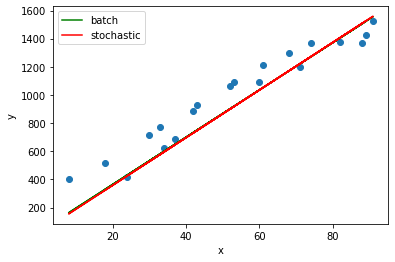

Batch      T0, T1: 28.619245060410634, 16.78182676675851
Stochastic T0, T1: 19.137808836283877, 16.924197285680798
Batch RMS:      0.007461378423007171
Stochastic RMS: 0.007295681329025042


In [ ]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'Batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'Stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
# Calculate Root Mean Square error in batch gradient descent algorithm and stochastic gradient descent algorithm
rms_batch = np.sqrt(1 / np.mean((params_hat_batch[0] + params_hat_batch[1] * x_test - y_test)**2))
rms_stochastic = np.sqrt(1 / np.mean((params_hat[0] + params_hat[1] * x_test - y_test)**2))
print(f'Batch RMS:      {rms_batch}')
print(f'Stochastic RMS: {rms_stochastic}')

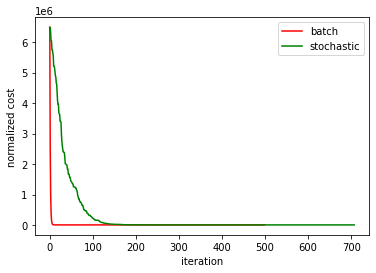

min cost with BGD: 6040.483498943172
min cost with SGD: 6402.514869695147


In [ ]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')

### Ridge Regression

\begin{equation}
\hat{\theta} = (X^TX + \lambda I)^{-1}X^TY
\end{equation}

where
\begin{equation}
X = [\bar{x}^T_1, \bar{x}^T_2, ... , \bar{x}^T_n]^T
\end{equation}

\begin{equation}
Y = [y_1, y_2, ... , y_n]^T
\end{equation}

This solution minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \sum_{i=1}^{m}(\theta^T\bar{x}_i - y_i)^2 + \lambda ||\theta||^2
\end{equation}

In [ ]:
class Ridge:
    """
    Linear least squares with L2 regularization.
    """
    
    def __init__(self, lam):
        """
        Initialize a Ridge object.
        lam: the regularization factor 
        """
        self._lambda = lam
        
    @staticmethod
    def _x_bar(x):
        """
        Create the vector x_bar.
        x: input vector
        """
        # Start code here
        return np.hstack(([1.0], x, np.square(x)))
        # End code here
    
    def fit(self, x_train, y_train):
        """
        Generate a fit for the data.
        x_train: the input values of the training data
        y_train: the output values of the training data
        """
        # Start code here
        # stack the data
        X = np.vstack(([self._x_bar(x) for x in x_train]))
        Y = np.vstack(([y for y in y_train]))
        
        # compute the model coeff
        XT = X.T
        XTX = np.dot(XT, X) + self._lambda * np.identity(3)
        XTX_inv = np.linalg.inv(XTX)
        XTY = np.dot(XT, Y)
        self._coeff_hat = np.dot(XTX_inv, XTY)
        # End code here

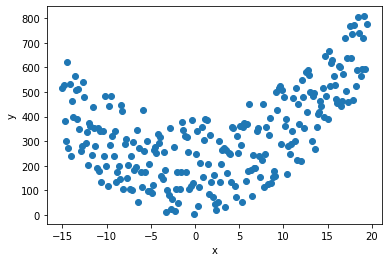

In [ ]:
# Do not change the code in this cell
c2 = 0.03
c1 = 1.25
c0 = 3.23
x_in = np.linspace(-15.0, 19.4, 250)
y_out = c1 * x_in ** 2 + c1 * x_in + c0 + 400.0 * np.random.rand(len(x_in))

plt.figure()
plt.scatter(x_in, y_out)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Do not change the code in this cell
# Train using the custom Ridge class

x_train, x_test, y_train, y_test = train_test_split(
    x_in, y_out, test_size=0.20)

lam = 0.1
ridge = Ridge(lam)
ridge.fit(x_train, y_train)

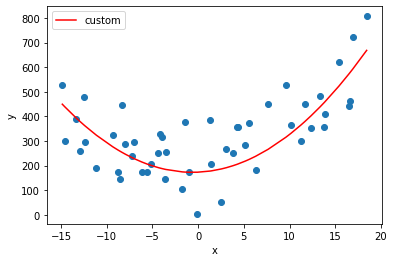

custom: [173.14115816], [1.6969767], [1.36464952]


In [ ]:
# Do not change the code in this cell
# Plot test data and model predictions
plt.figure()
plt.scatter(x_test, y_test)
x_test_sorted = np.sort(x_test)
plt.plot(x_test_sorted,
         ridge._coeff_hat[0] + ridge._coeff_hat[1]*x_test_sorted + ridge._coeff_hat[2]*x_test_sorted**2,
         '-r', label='custom')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# print the coeff
print(f'custom: {ridge._coeff_hat[0]}, {ridge._coeff_hat[1]}, {ridge._coeff_hat[2]}')

In [ ]:
# Effect of regularization factor
coeff_store = []
norm_store = []
factors = np.linspace(0.0, 1.0, 10)
for l in factors:
    # Star code here
    # instantiate the Ridge class using l and store it in ridge
    ridge = Ridge(l)
    # fit the data to your model
    ridge.fit(x_train, y_train)
    # append co-effecients 
    coeff_store.append(ridge._coeff_hat)
    # append normalized co-effecients using np.linalg.norm
    norm_store.append(np.linalg.norm(ridge._coeff_hat))


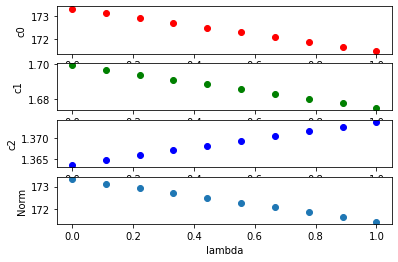

In [ ]:
# Do not change the code in this cell
plt.figure()
plt.subplot(411)
coeff_0 = [c[0] for c in coeff_store]
plt.plot(factors, coeff_0, 'or')
plt.ylabel('c0')
plt.subplot(412)
coeff_1 = [c[1] for c in coeff_store]
plt.plot(factors, coeff_1, 'og')
plt.ylabel('c1')
plt.subplot(413)
coeff_2 = [c[2] for c in coeff_store]
plt.plot(factors, coeff_2, 'ob')
plt.ylabel('c2')
plt.subplot(414)
plt.plot(factors, norm_store, 'o')
plt.xlabel('lambda')
plt.ylabel('Norm')
plt.show()

(b) Similarly for n way branching
Use d denotes dataset, the entropy of the original dataset is H(d)

$$H(D)=−∑_iP(D_i)log_2(P(D_i))$$

Split the dataset into n features $F = (f_1, f_2, ... f_n)$, the entropy for all the child nodes can be calculated as:

$$P(f_1)H(D_1) + P(f_2)H(D_2) + ... + P(f_n)H(D_n) = H(D, F) - H(F)$$

$$\Delta H = H(D) - H(D, F) + H(F) \leq H(F)$$

where,

$$H(F)_{max} = -\frac{1}{n} log_2 (\frac {1}{n}) * n = log_2 (n)$$

$$\Delta H \leq log_2 (n)$$

So decrease in entropy by a split on a n way branching can never be greater than $log_2(n)$ bit